# "Predictive Drug Selection Model for Patients with Common Illness"
For this project, information was gathered regarding a group of patients who experienced a common ailment. Throughout their treatment regimen, these patients exhibited responses to medications A, B, C, X, and Y. The main objective of this project is to construct a model that can identify the appropriate medication for a future patient facing the same health condition. The dataset includes patient attributes such as age, sex, blood pressure, and cholesterol levels. The ultimate goal is to predict which medication will be suitable for new patients.

Import libraries:

In [84]:
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Read dataset:

In [5]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

## Data visualization

In [16]:
#Shape of dataset
print(data.shape)
# See all the columns
data.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


The data has 6 characteristics and 200 atributes
In general, the data is smaller than others dataset, however we can predict the best drug for any pacient based in that charateristics before explained.
We need to see if dataset has null values:

In [13]:
data.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

This dataset has not null values.

<Axes: xlabel='Sex', ylabel='Count'>

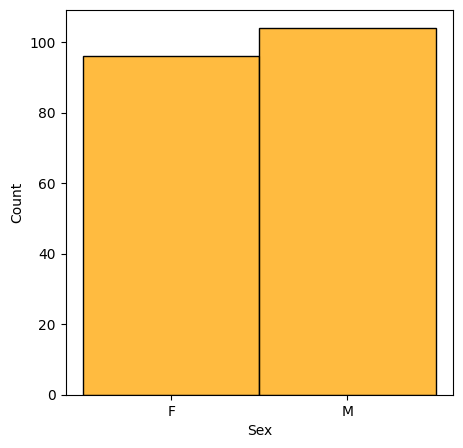

In [21]:
plt.figure(figsize = (5,5))
sns.histplot(data.Sex,color = 'Orange')

In this dataset we can see there is more masculine genre than femenine genre.
In therms of the drugs:

<Axes: xlabel='Drug', ylabel='Count'>

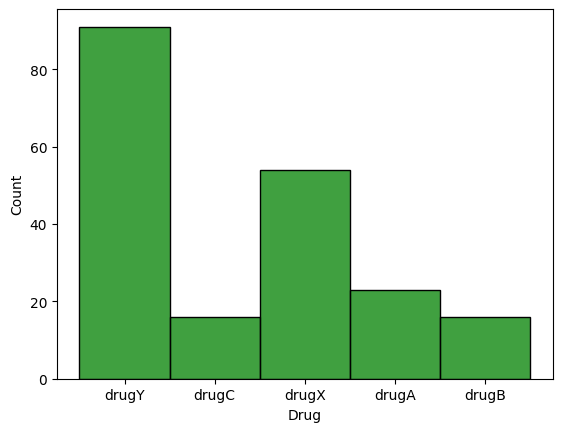

In [22]:
sns.histplot(data.Drug, color = 'Green')

The drug most used is Drug Y and Drug X and then exist 5 clasifications of drugs.


<Axes: xlabel='BP', ylabel='Count'>

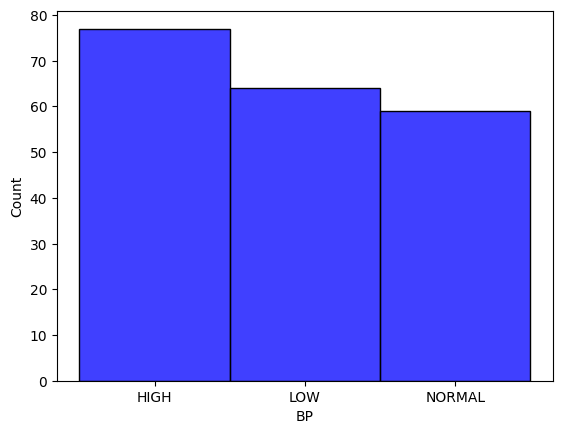

In [65]:
sns.histplot(data.BP,color = 'Blue')

In [74]:
sex_v = data.Sex.unique()
drug_v = data.Drug.unique()
bp_v = data.BP.unique()
chol_v = data.Cholesterol.unique()
print('Sex values: ',sex_v)
print('Drug values: ',drug_v)
print('BP values: ',bp_v)
print('Chrolesterol values: ',chol_v)



Sex values:  ['F' 'M']
Drug values:  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']
BP values:  ['HIGH' 'LOW' 'NORMAL']
Chrolesterol values:  ['HIGH' 'NORMAL']


## Prepare data


We must separate the target and predictors values:

In [46]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [103]:
predictors = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
target = data['Drug'].values
print("Predictors: \n",predictors[0:5])
print("Target: \n",target[0:5])

Predictors: 
 [[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]
Target: 
 ['drugY' 'drugC' 'drugC' 'drugX' 'drugY']


Categorical variables need to convert in numerical values:

In [104]:
le_sex = preprocessing.LabelEncoder()
le_sex = le_sex.fit(['M','F'])
predictors[:,1] = le_sex.transform(predictors[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP = le_BP.fit(bp_v)
predictors[:,2] = le_BP.transform(predictors[:,2])

le_ch = preprocessing.LabelEncoder()
le_ch = le_ch.fit(chol_v)
predictors[:,3] = le_ch.transform(predictors[:,3])


In [105]:
predictors[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

We need to separate the train and test values

In [107]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.3, random_state=5)

## Training and prediction

In [108]:
category_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
category_model # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [109]:
category_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

So we can predict any value. For this purpose, we use the x_test to test the model.

In [111]:
predict = category_model.predict(x_test)

We can visualize the results for the predictions




In [113]:
print(predict[0:5])
print(y_test[0:5])

['drugY' 'drugY' 'drugX' 'drugC' 'drugY']
['drugY' 'drugY' 'drugX' 'drugC' 'drugY']


In this case we can compare the predictions and the values of the test models. The values are the same.


## Evaluation of the model


In [115]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predict))

DecisionTrees's Accuracy:  1.0


The model has a good predicts for any value